In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Загрузка данных

In [150]:
train_data = pd.read_csv('/content/sample_data/fish_train.csv')
test_data = pd.read_csv('/content/sample_data/fish_reserved.csv')

In [151]:
X = train_data.drop('Weight', axis=1)  # Все столбцы, кроме 'Weight'
X = X.drop('Species', axis=1)
y = train_data['Weight']
z = train_data['Species']

test_data = test_data.drop('Species', axis=1)

# Разбиение данных на обучающую и тестовую выборки со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11,stratify=z)

In [152]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации R^2:", r2)

Коэффициент детерминации R^2: 0.8538529230334997


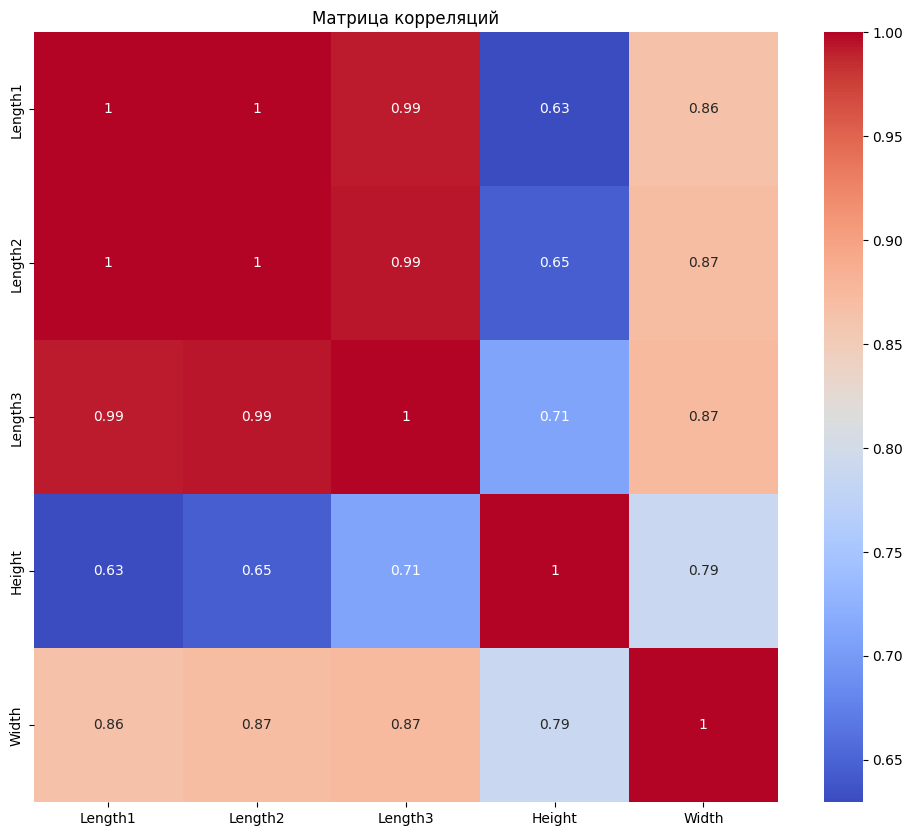

Length1  Length2    0.999471
Length2  Length1    0.999471
         Length3    0.993667
dtype: float64


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем матрицу корреляций для числовых признаков в тренировочном наборе
corr_matrix = X_train.corr()

# Визуализируем матрицу корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

# Находим тройку наиболее коррелированных пар признаков (по абсолютной величине корреляции)
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs != 1]  # Убираем корреляцию признака с самим собой
top_corr_pairs = corr_pairs.head(3)
print(top_corr_pairs)

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Выбираем три наиболее коррелированные признака (замените 'feature1', 'feature2', 'feature3' на ваши реальные названия)
selected_features = ['Length1', 'Length2', 'Length3']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
test_data_selected = test_data[selected_features]

# Стандартизация данных (необходима для PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.fit_transform(X_test_selected)
test_data_scaled = scaler.fit_transform(test_data_selected)

# Создание и обучение модели PCA
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X_train_scaled)

pca2 = PCA(n_components=3, svd_solver='full')
pca2.fit(X_test_scaled)

pca3 = PCA(n_components=3, svd_solver='full')
pca2.fit(test_data_scaled)

# Преобразование данных к новым координатам
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca2.transform(X_test_scaled)
test_data_pca = pca2.transform(test_data_scaled)

# Создание нового признака Lengths для тренировочных и тестовых данных
X_train['Lengths'] = X_train_pca[:, 0]
X_test['Lengths'] = X_test_pca[:, 0]
test_data['Lengths'] = test_data_pca[:, 0]

# Удаление старых признаков для тренировочных и тестовых данных
X_train.drop(selected_features, axis=1, inplace=True)
test_data.drop(selected_features, axis=1, inplace=True)
X_test.drop(selected_features, axis=1, inplace=True)

In [154]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации R^2:", r2)

Коэффициент детерминации R^2: 0.8538529230334997


In [155]:
# Возведение в куб выбранных столбцов для тренировочных и тестовых данных
for col in ['Length1', 'Width','Height', 'Length2', 'Length3']:
    X_train[col] = X_train[col]**3
    X_test[col] = X_test[col]**3
    test_data[col] = test_data[col]**3


In [156]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации R^2:", r2)

Коэффициент детерминации R^2: 0.9754884646807511


In [157]:
y_pred = model.predict(test_data)
print(list(y_pred))
len(list(y_pred))

[117.07708160402716, 121.27068720606563, 84.97830527675245, 109.36145640829243, 85.47482279764856, 158.1121553434304, 59.84328626989946, 540.0052176898059, 397.21766557441833, 123.70562789669654, 1851.7574126158106, 158.73763357791154, 626.7392743442967, 1081.9537420955776, 35.55301911161335, 605.4563818617346, 133.69422387381036, 805.0520254016474, 1415.1680764556056, 85.42302893226956, 588.3358210621088, 197.18210056702566, 81.5735403450459, 156.65699973640642, 357.09276943296936, 588.401252016731, 278.64411002360424, 25.86201454864716, 37.31748354443978, 21.068756845859546, 996.9018164210245, 476.6994363047151, 540.2581205459344, 149.96061006248306, 25.685023758233747, 87.82539729164942, 122.5807365064698, 929.8184759834601, 744.1979800402221, 130.88867086949836]


40

In [138]:
# Использование градиентного бустинга
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации R^2:", r2)

Коэффициент детерминации R^2: 0.9391844120546409


In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации R^2:", r2)


Коэффициент детерминации R^2: 0.9547535519727067


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'fit_intercept': [True, False]}

grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'fit_intercept': True}
0.9369153569781276
